In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
movies = pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
s = (movies.dtypes == 'object')
s

V1                True
V2                True
V3                True
V4                True
V5                True
Sixth Sense      False
Gladiator        False
LOTR1            False
Harry Potter1    False
Patriot          False
LOTR2            False
Harry Potter2    False
LOTR             False
Braveheart       False
Green Mile       False
dtype: bool

In [9]:
object_cols = list(s[s].index)
object_cols

['V1', 'V2', 'V3', 'V4', 'V5']

In [14]:
num_movie = movies.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## Apriori Algo

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


In [18]:
frequent_itemsets_ap.shape

(13, 2)

In [19]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())


     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.190476      0.08         1.8       0.400000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    1.000000  1.666667      0.08         inf       0.500000  


In [21]:
#Filtering with greater than 0.015 support AND 0.4 confidence 
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


1) lift: This column represents the lift of the rule, which measures the ratio of the observed support to that expected if the antecedent and consequent were independent.

2) leverage: This column represents the leverage of the rule, which measures the difference between the observed support and that expected if the antecedent and consequent were independent.

3) conviction: This column represents the conviction of the rule, which is the ratio of the expected frequency that the antecedent occurs without the consequent to the observed frequency of erroneous predictions of the consequent.

4) zhangs_metric: This column appears to represent a metric calculated for the association rule, but without more context, it's difficult to provide a precise explanation of its meaning. It might be a custom metric or a variant of an existing metric used in association rule mining.

In [22]:
#Showing more than 1 items for antecedents
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


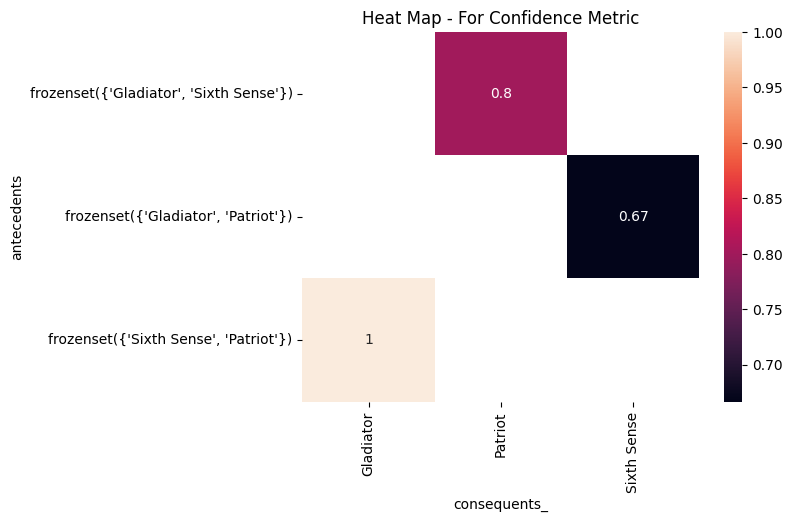

In [24]:
# Generate a heatmap with annotations 
# Transform the DataFrame of rules into a matrix using the confidence metric

rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents', 
                    columns = 'consequents_', values= 'confidence')

sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90);


In [25]:
df=num_movie.copy()

support_values = [0.1, 0.15, 0.2]  
confidence_values = [0.5, 0.6, 0.7]

for support in support_values:
    for confidence in confidence_values:
        frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Support: {support}, Confidence: {confidence}, Number of Rules: {len(rules)}")

Support: 0.1, Confidence: 0.5, Number of Rules: 216
Support: 0.1, Confidence: 0.6, Number of Rules: 134
Support: 0.1, Confidence: 0.7, Number of Rules: 129
Support: 0.15, Confidence: 0.5, Number of Rules: 15
Support: 0.15, Confidence: 0.6, Number of Rules: 14
Support: 0.15, Confidence: 0.7, Number of Rules: 9
Support: 0.2, Confidence: 0.5, Number of Rules: 15
Support: 0.2, Confidence: 0.6, Number of Rules: 14
Support: 0.2, Confidence: 0.7, Number of Rules: 9


In [41]:
#Now the same thing with threshold as 0.8 and lift as a metric

rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

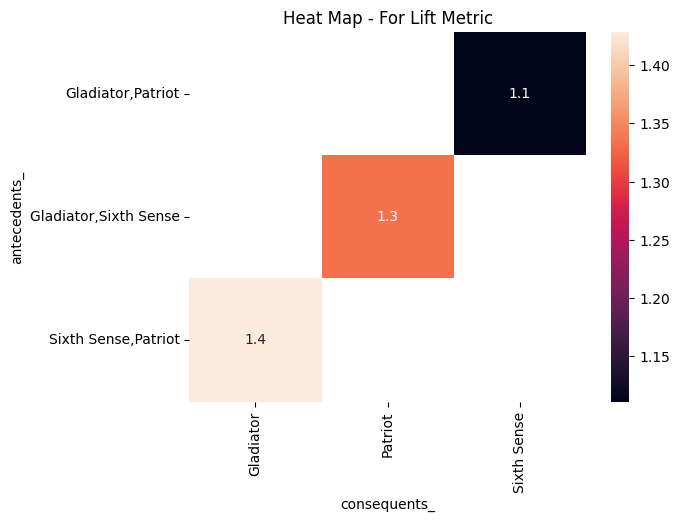

In [27]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

## FpGrowth Algorithm

In [31]:
# using different supports for the fp growth
for s in support_values:
    frequent_itemsets_fp=fpgrowth(num_movie, min_support=s, use_colnames=True,verbose=1)
    print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)
7 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
1 itemset(s) from tree conditioned on items (Green Mile)
0 itemset(s) from tree conditioned on items (LOTR2)
0 itemset(s) from tree conditioned on items (Harry Potter1)
1 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 it

In [33]:
#Lets try for the minimum threshold
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
frequent_itemsets_fp.sort_values("support", ascending = False).head()

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)


,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [36]:
#Using confidence metric
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).head()
# print(rules_fp.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,0.50
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.50
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.00
99,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.75


In [38]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_,consequents_,lhs items
126,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,"Sixth Sense,LOTR","Gladiator,Green Mile",2
22,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,"Green Mile,Harry Potter1","LOTR2,Sixth Sense",2
88,"(LOTR1, Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,"LOTR1,Green Mile,Harry Potter1","LOTR2,Sixth Sense",3
87,"(LOTR1, Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,"LOTR1,Harry Potter1,Sixth Sense","LOTR2,Green Mile",3
86,"(LOTR1, Green Mile, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,"LOTR1,Green Mile,Sixth Sense","LOTR2,Harry Potter1",3


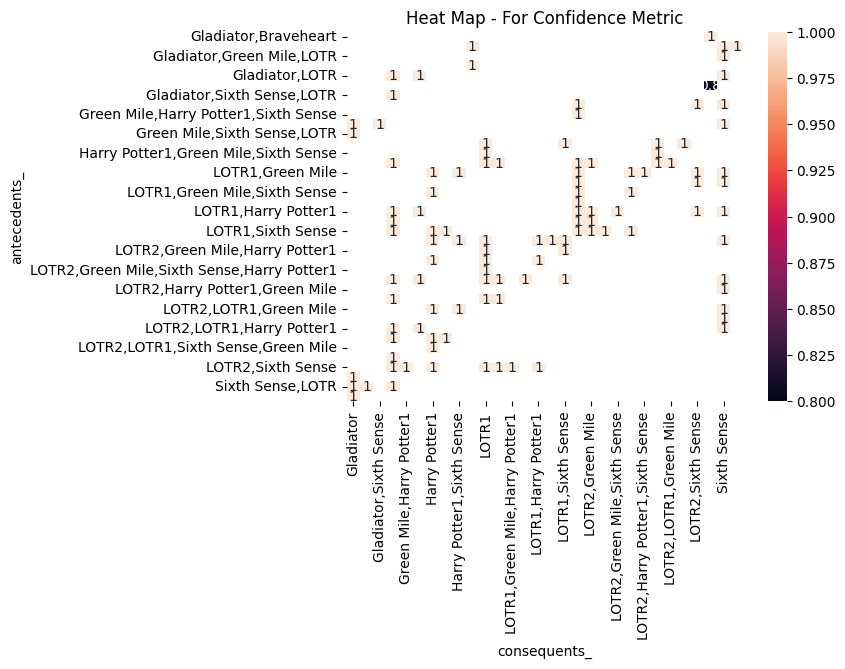

In [40]:
#Using confidence as metric
#Heatmap
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

In [43]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
241,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
58,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
176,"(LOTR1, Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,3
175,"(LOTR1, Green Mile, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,3
174,"(LOTR2, Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,3


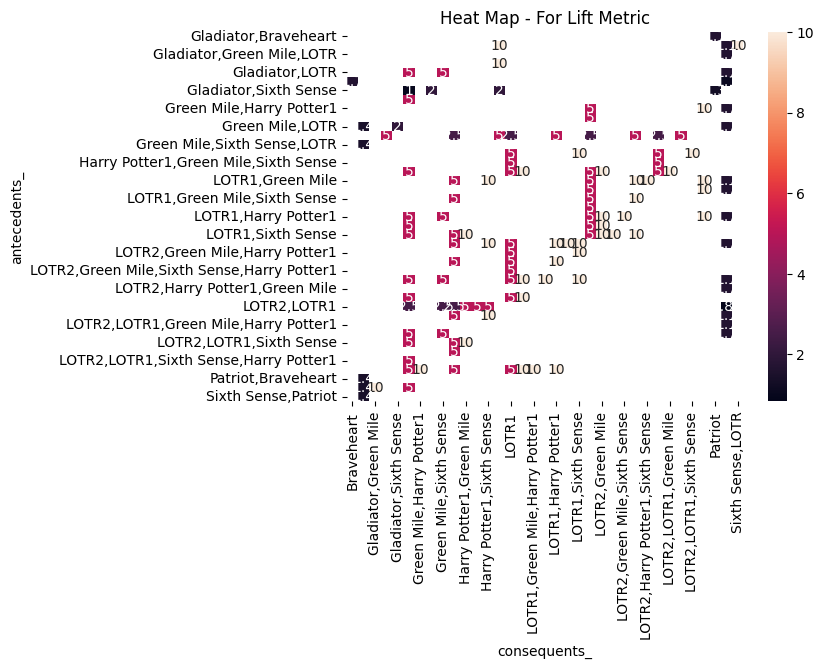

In [45]:
#This is using Lift as metric

rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90);